In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Set the font path to Hiragino Sans GB
font_path = '/System/Library/Fonts/Hiragino Sans GB.ttc'
font_prop = font_manager.FontProperties(fname=font_path)

# Set the font globally for all text
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # To ensure minus signs are rendered correctly


In [8]:
import numpy as np
import json

# Data extracted from the JSON file
path = "../outputs/entity2scores_test.json"

with open(path, 'r') as f:
    data = json.load(f)

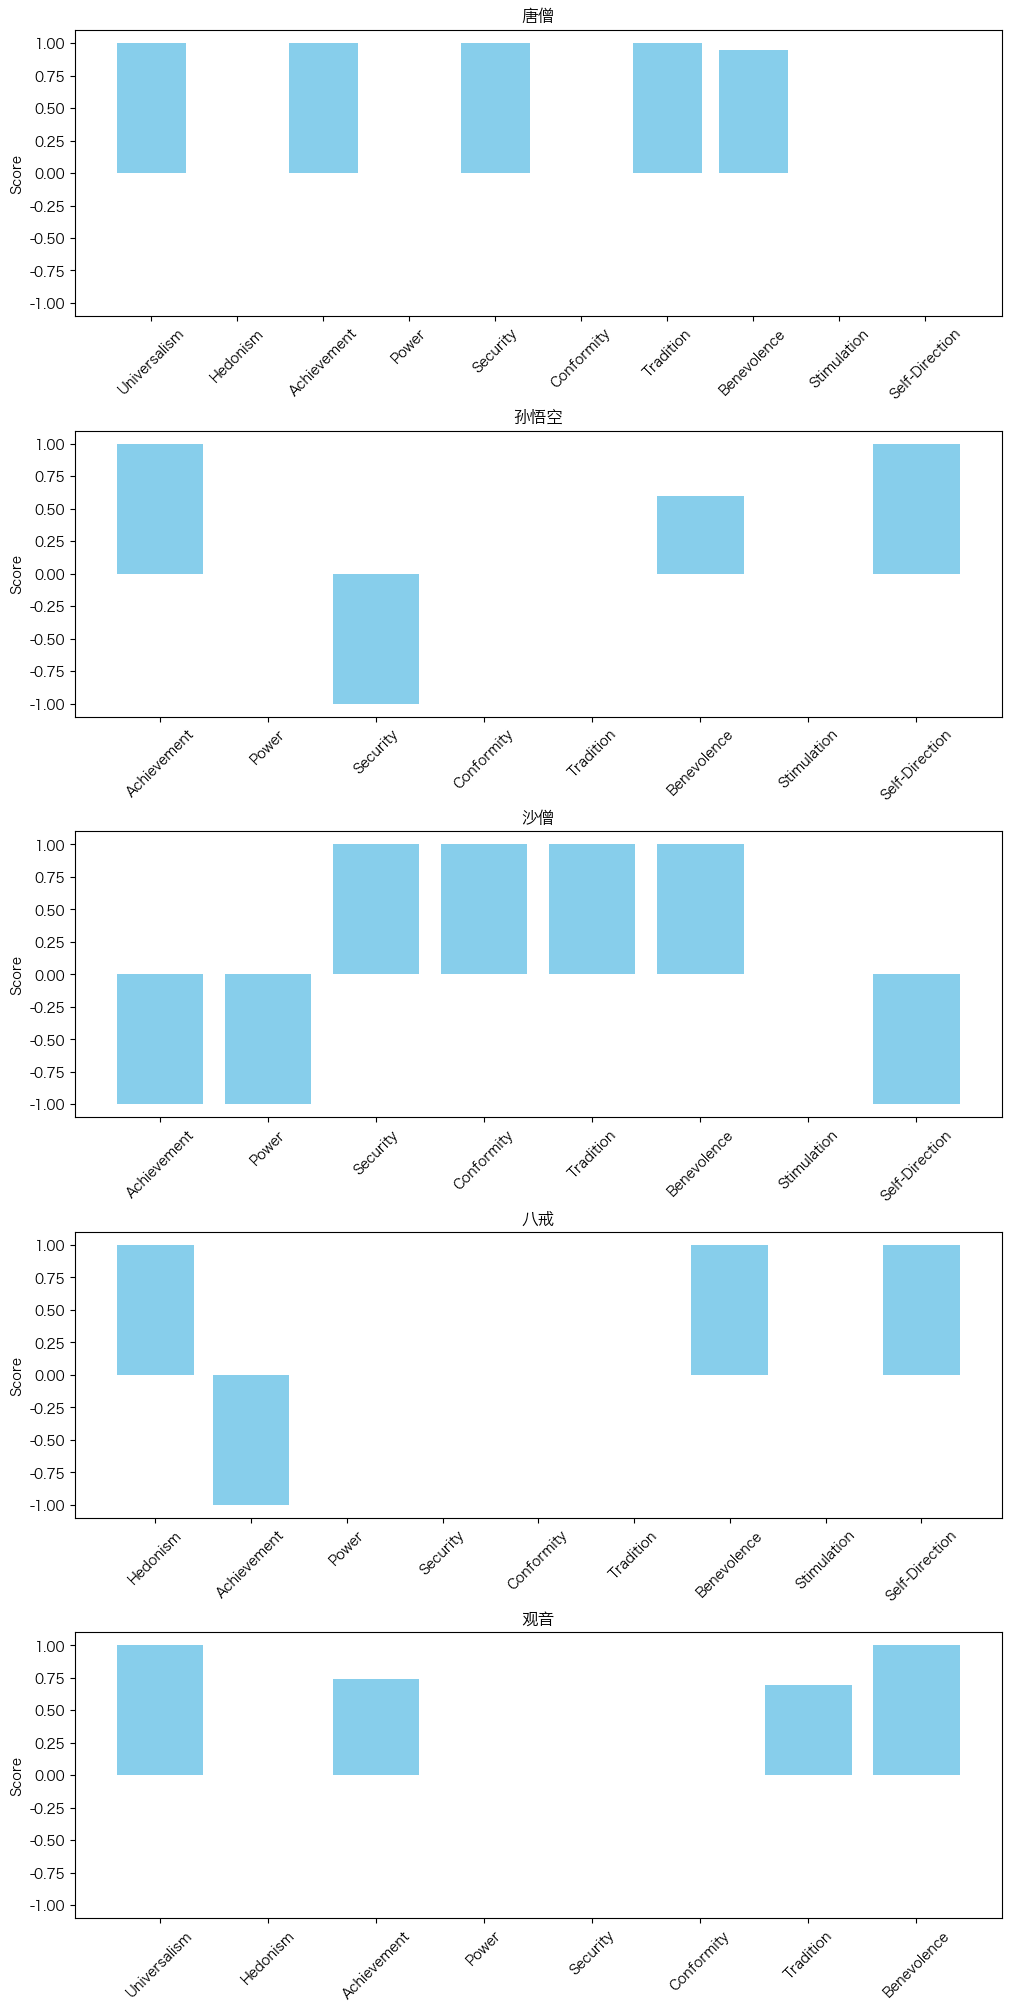

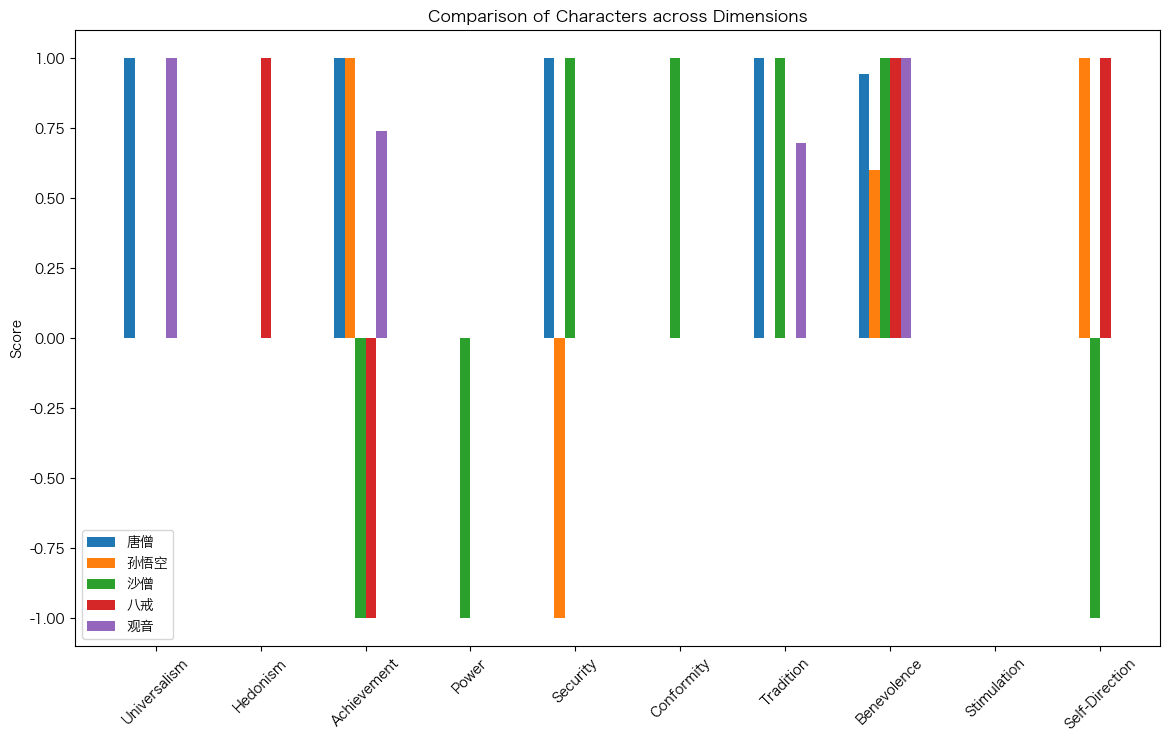

In [9]:
# Convert None to NaN
for char in data:
    for key, value in data[char].items():
        if value is None:
            data[char][key] = np.nan

# Define characters and values
characters = list(data.keys())
dimensions = ["Universalism", "Hedonism", "Achievement", "Power", "Security", 
              "Conformity", "Tradition", "Benevolence", "Stimulation", "Self-Direction"]

# Plotting individual bar charts for each character
fig, axs = plt.subplots(len(characters), 1, figsize=(10, 20), constrained_layout=True)

for i, char in enumerate(characters):
    scores = [data[char][dim] for dim in dimensions]
    axs[i].bar(dimensions, scores, color='skyblue')
    axs[i].set_title(char)
    axs[i].set_ylim(-1.1, 1.1)
    axs[i].set_ylabel('Score')
    axs[i].tick_params(axis='x', rotation=45)
    
# Plotting combined bar chart
fig2, ax2 = plt.subplots(figsize=(14, 8))

for i, char in enumerate(characters):
    scores = [data[char][dim] for dim in dimensions]
    x_positions = np.arange(len(dimensions)) + (i - len(characters)/2)*0.1
    ax2.bar(x_positions, scores, width=0.1, label=char)

ax2.set_xticks(np.arange(len(dimensions)))
ax2.set_xticklabels(dimensions, rotation=45)
ax2.set_ylim(-1.1, 1.1)
ax2.set_ylabel('Score')
ax2.set_title('Comparison of Characters across Dimensions')
ax2.legend()

plt.show()
